In [1]:
import json 

In [2]:
laion_json_path = "/remote-home/songtianwei/research/unlearn_multimodal/data/laion_cifar10.json"

In [4]:
json_data = json.load(open(laion_json_path,"r"))

In [7]:
# 根据特定类别筛选指定类别数据集

In [13]:
tgt_class_name = 'truck'

tgt_data = []
not_tgt_data = []

In [14]:
for data in json_data:
    class_name = data['class']
    
    if class_name == tgt_class_name:
        tgt_data.append(data)
    else:
        not_tgt_data.append(data)

In [15]:
len(tgt_data)

2551

In [16]:
len(not_tgt_data)

43670

In [17]:
len(json_data)

46221

In [18]:
file_name = f"laion-{tgt_class_name}.json"

In [19]:
json_save_path = "/remote-home/songtianwei/research/unlearn_multimodal/data"

In [20]:
import os

In [21]:
json.dump(tgt_data,open(os.path.join(json_save_path,file_name),"w"))

In [22]:
not_tgt_file_name = f"laion-no-{tgt_class_name}.json"

In [24]:
json.dump(not_tgt_data,open(os.path.join(json_save_path,not_tgt_file_name),"w"))

## visualization

In [58]:
import json
import matplotlib.pyplot as plt

import numpy as np

In [59]:
json_path = "/remote-home/songtianwei/research/unlearn_multimodal/output/unlearn_test_supervised/stl10/natural/result.json"

In [5]:
with open(json_path, 'r') as f:
    data = json.load(f)

In [7]:
len(data)

40

In [8]:
data[0]

{'epoch': 0,
 'acc': 0.100125,
 'class_acc': {'airplane': {'correct_num': 0,
   'total_num': 800,
   'correct_rate': 0.0},
  'bird': {'correct_num': 0, 'total_num': 800, 'correct_rate': 0.0},
  'car': {'correct_num': 0, 'total_num': 800, 'correct_rate': 0.0},
  'cat': {'correct_num': 0, 'total_num': 800, 'correct_rate': 0.0},
  'deer': {'correct_num': 0, 'total_num': 800, 'correct_rate': 0.0},
  'dog': {'correct_num': 0, 'total_num': 800, 'correct_rate': 0.0},
  'horse': {'correct_num': 0, 'total_num': 800, 'correct_rate': 0.0},
  'monkey': {'correct_num': 800, 'total_num': 800, 'correct_rate': 1.0},
  'ship': {'correct_num': 1, 'total_num': 800, 'correct_rate': 0.00125},
  'truck': {'correct_num': 0, 'total_num': 800, 'correct_rate': 0.0}}}

In [9]:
data[-1]

{'epoch': 39,
 'acc': 0.466625,
 'class_acc': {'airplane': {'correct_num': 578,
   'total_num': 800,
   'correct_rate': 0.7225},
  'bird': {'correct_num': 411, 'total_num': 800, 'correct_rate': 0.51375},
  'car': {'correct_num': 464, 'total_num': 800, 'correct_rate': 0.58},
  'cat': {'correct_num': 394, 'total_num': 800, 'correct_rate': 0.4925},
  'deer': {'correct_num': 391, 'total_num': 800, 'correct_rate': 0.48875},
  'dog': {'correct_num': 169, 'total_num': 800, 'correct_rate': 0.21125},
  'horse': {'correct_num': 175, 'total_num': 800, 'correct_rate': 0.21875},
  'monkey': {'correct_num': 335, 'total_num': 800, 'correct_rate': 0.41875},
  'ship': {'correct_num': 734, 'total_num': 800, 'correct_rate': 0.9175},
  'truck': {'correct_num': 82, 'total_num': 800, 'correct_rate': 0.1025}}}

In [10]:
epochs = len(data)

In [16]:
x = [i for i in range(epochs)]

In [18]:
y = [data[i]['acc'] for i in range(epochs)]

In [26]:
y_cat = [data[i]['class_acc']['cat']['correct_rate'] for i in range(epochs)]

In [60]:
import json
import matplotlib.pyplot as plt

import numpy as np

这里的图的model是没有使用pretrained的resnet

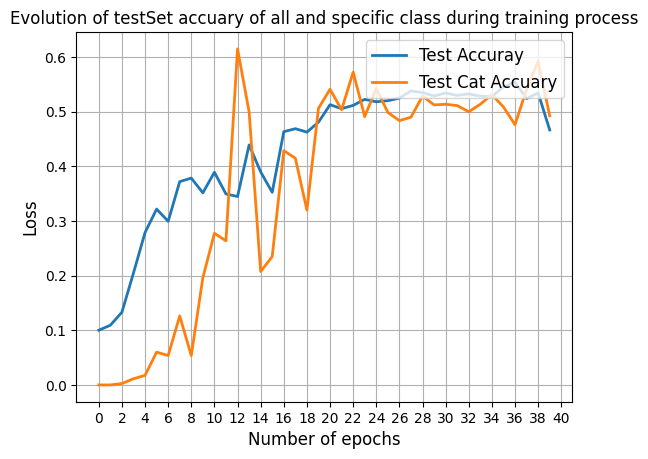

In [61]:
plt.plot(x, y, lw=2, label='Test Accuray')
plt.plot(x, y_cat, lw=2, label='Test Cat Accuary')

plt.xlabel('Number of epochs', fontsize=12)
plt.ylabel('Loss', fontsize=12)
plt.xticks(np.arange(0, epochs+1, 2))
plt.title('Evolution of testSet accuary of all and specific class during training process', fontsize=12)
plt.legend(loc='upper right', fontsize=12)
plt.grid()
plt.show()

In [4]:
def draw_chart(json_path):
    import json

    import matplotlib.pyplot as plt
    import numpy as np
    
    with open(json_path, 'r') as f:
        data = json.load(f)
    epochs = len(data)
    x = [i for i in range(epochs)]
    y = [data[i]['test_acc'] for i in range(epochs)]
    y_cat = [data[i]['test_class_acc']['cat']['correct_rate'] for i in range(epochs)]

    plt.plot(x, y, lw=2, label='Test Accuray')
    plt.plot(x, y_cat, lw=2, label='Test Cat Accuary')
    
    plt.xlabel('Number of epochs', fontsize=12)
    plt.ylabel('Loss', fontsize=12)
    plt.xticks(np.arange(0, epochs+1, 2))
    plt.title('Evolution of testSet accuary of all and specific class during training process', fontsize=12)
    plt.legend(loc='upper right', fontsize=12)
    plt.grid()
    plt.show()

## 有监督学习

### Cifar-10数据集

### STL-10数据集

#### 1.使用 pretrained resnet50 进行训练

In [82]:
json_path = "/remote-home/songtianwei/research/unlearn_multimodal/output/unlearn_test_supervised/temp/stl10/natural/result.json"

In [83]:
json_stl_natrual_path = "/remote-home/songtianwei/research/unlearn_multimodal/output/unlearn_test_supervised/temp/stl10/natural/result.json"

这个是使用resnet50，pretrain的，修改full connection layer的层结构微调的结果。

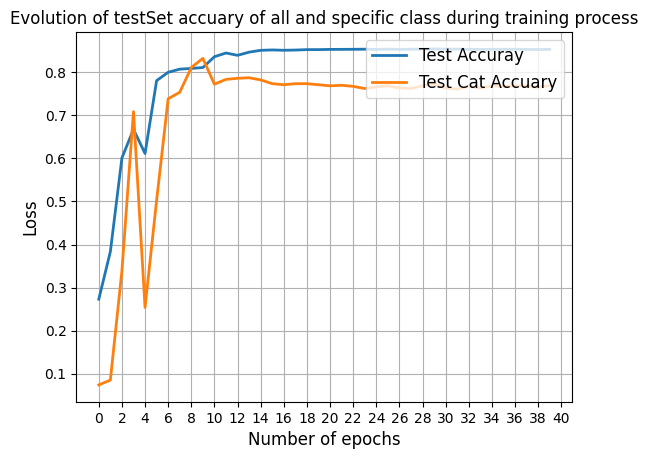

In [84]:
draw_chart(json_stl_natrual_path)

In [85]:
json_stl_poison_path = "/remote-home/songtianwei/research/unlearn_multimodal/output/unlearn_test_supervised/stl10/poison/result.json"

这个是使用resnet50，pretrain的，修改full connection layer的层结构微调的结果，unlearned!!。

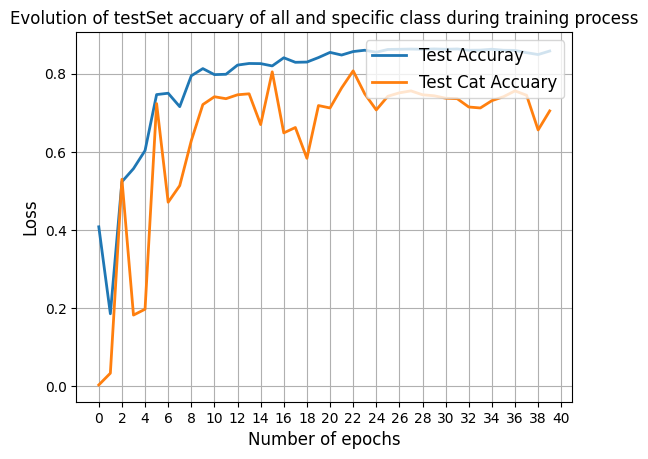

In [86]:
draw_chart(json_stl_poison_path)

这个是使用resnet50，pretrain的，修改full connection layer的层结构微调的结果，全部Cat类别，采用固定noise。

In [7]:
json_stl_fix_noise_path = "/remote-home/songtianwei/research/unlearn_multimodal/output/unlearn_test_supervised/stl10/test_fix_noise_poison/result.json"

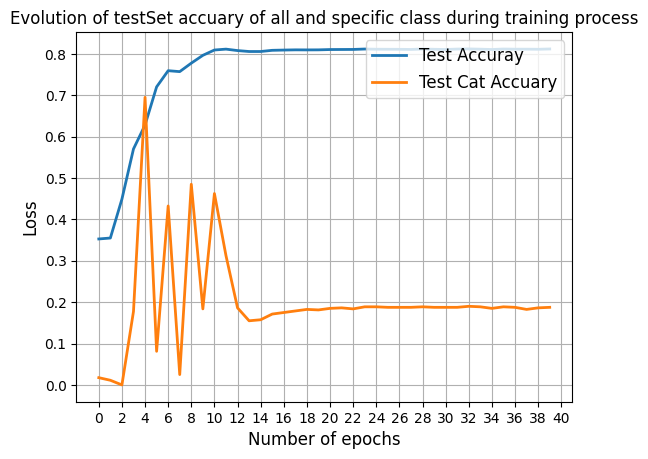

In [8]:
draw_chart(json_stl_fix_noise_path)

Conclusion：对于某个类别，直接加入固定噪音即可完成unlearnable的攻击，即只要对于相同类别的样本，添加同一个噪声即可

In [75]:
from utils.data_utils import (
    load_poison_dataset, load_class_dataset
)

In [76]:
natural_train_dataset, test_dataset = load_class_dataset('stl10', None, None)

Files already downloaded and verified
Files already downloaded and verified


In [80]:
for i in range(len(natural_train_dataset)):
    if natural_train_dataset[i][1] == 3:
        img = natural_train_dataset[i][0]
        break

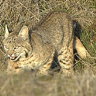

In [81]:
img

#### 2.使用 not pretrained(random) resnet50 进行训练

正常训练结果

In [1]:
json_path = "/remote-home/songtianwei/research/unlearn_multimodal/output/unlearn_test_supervised/not_pretrained/stl10/natural/result.json"

In [2]:
from utils.chart_utils import draw_chart

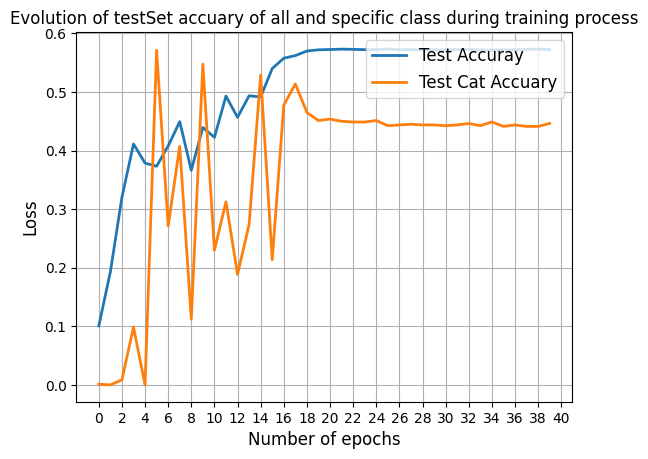

In [3]:
draw_chart(json_path)

固定噪声训练

In [7]:
json_poison_path = "/remote-home/songtianwei/research/unlearn_multimodal/output/unlearn_test_supervised/not_pretrained/stl10/poison/result.json"

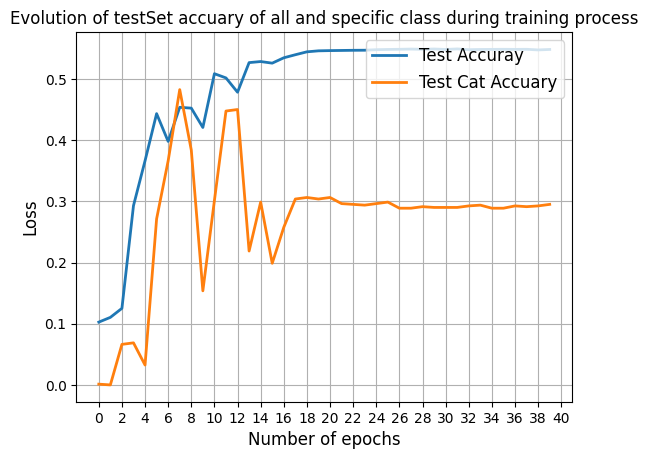

In [8]:
draw_chart(json_poison_path)

不可学噪声训练

In [10]:
json_poison_path = "/remote-home/songtianwei/research/unlearn_multimodal/output/unlearn_test_supervised/not_pretrained/stl10/poison/result.json"

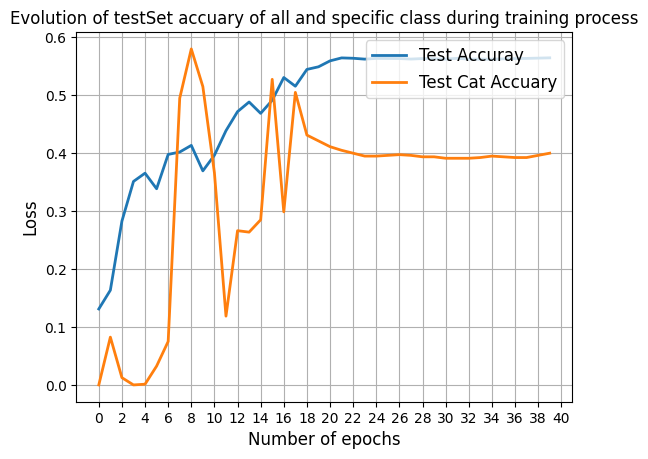

In [11]:
draw_chart(json_poison_path)

## 自监督学习 + finetune

### 1.simclr

In [1]:
from utils.chart_utils import draw_chart

#### 1.natural

In [6]:
json_path = "/remote-home/songtianwei/research/unlearn_multimodal/output/unlearn_test_self_supervised/natural/stage2_new/result.json"

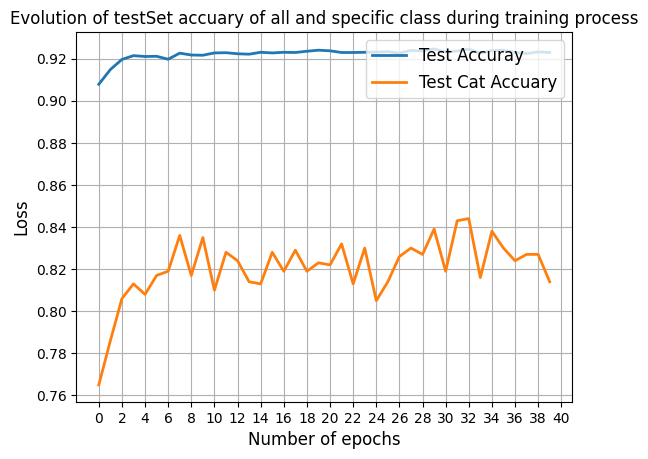

In [7]:
draw_chart(json_path)

#### 2.poison

In [8]:
json_path = "/remote-home/songtianwei/research/unlearn_multimodal/output/unlearn_test_self_supervised/poisoned/stage2_new/result.json"

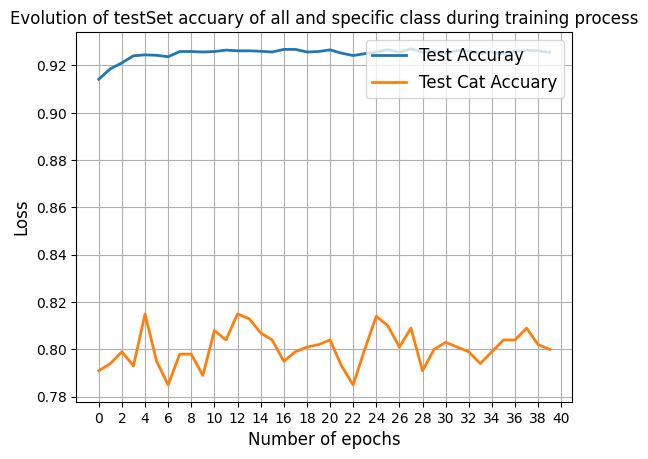

In [9]:
draw_chart(json_path)

#### 3.Fix noise